In [ ]:
import numpy as np
import math
import os.path
import csv
import glob
import tensorflow as tf
import h5py as h5py
from keras.preprocessing import image
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import Model, load_model
import cv2

In [ ]:
import imageio
import matplotlib.pyplot as plt
from mlxtend.image import extract_face_landmarks

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
def eye_aspect_ratio(eye):
	A = distance.euclidean(eye[1], eye[5])
	B = distance.euclidean(eye[2], eye[4])
	C = distance.euclidean(eye[0], eye[3])
	ear = (A + B) / (2.0 * C)
	return ear

In [ ]:
def mouth_aspect_ratio(mouth):
    A = distance.euclidean(mouth[14], mouth[18])
    C = distance.euclidean(mouth[12], mouth[16])
    mar = (A ) / (C)
    return mar

In [ ]:
def circularity(eye):
    A = distance.euclidean(eye[1], eye[4])
    radius  = A/2.0
    Area = math.pi * (radius ** 2)
    p = 0
    p += distance.euclidean(eye[0], eye[1])
    p += distance.euclidean(eye[1], eye[2])
    p += distance.euclidean(eye[2], eye[3])
    p += distance.euclidean(eye[3], eye[4])
    p += distance.euclidean(eye[4], eye[5])
    p += distance.euclidean(eye[5], eye[0])
    return 4 * math.pi * Area /(p**2)

In [ ]:
def mouth_over_eye(eye):
    ear = eye_aspect_ratio(eye)
    mar = mouth_aspect_ratio(eye)
    mouth_eye = mar/ear
    return mouth_eye

In [ ]:
from PIL import Image
def getFrame(sec):
    start = 180000
    vidcap.set(cv2.CAP_PROP_POS_MSEC, start + sec*1000)
    hasFrames,image = vidcap.read()
    # print(image)
    # print(type(image))
    # img = Image.fromarray(image,'RGB')
    # img.show()
    # img=img.rotate(angle)
    # # img.save('my.png')
    # # print(img)
    # image= np.asarray(img)
    return hasFrames, image

['0.mov', '10.MOV']
Folder 1, user 2, label 0.mov


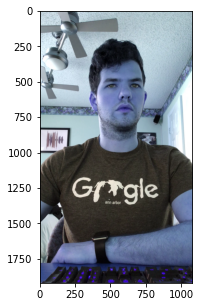




Rotate? 1
angle:0


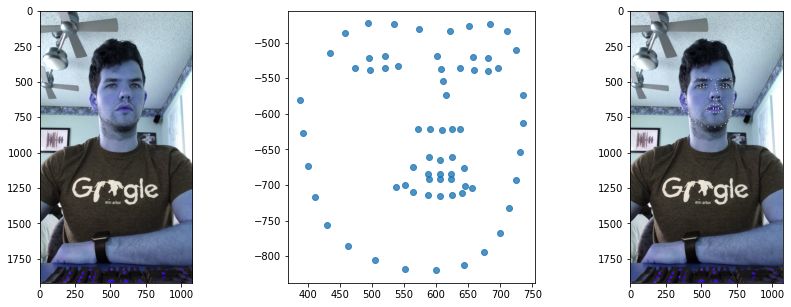

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
Folder 1, user 2, label 10.MOV


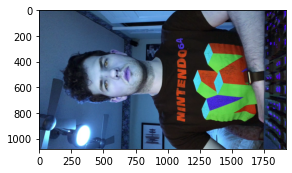




Rotate? 1
angle:270


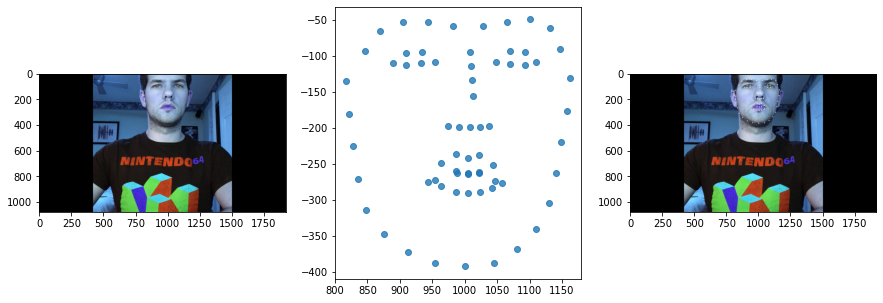

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240


In [ ]:
# main program
import os
from scipy.spatial import distance
import cv2

for fold in [1, 2, 3, 4, 5]:
  for user in [1, 2, 3, ,4, 5, 6]:
    
    root_dir='drive/My Drive/Colab Notebooks/Driver_drowsiness/Fold'+str(fold)+'_part1/' + str(user) 
    file_names=os.listdir(root_dir)
    print(file_names)
    for label in file_names:

      data = (list)([])
      labels = (list)([])
      labels.append([0])
      print('Folder '+str(fold)+', user '+str(user)+ ', label '+ str(label))
      vidcap = cv2.VideoCapture('drive/My Drive/Colab Notebooks/Driver_drowsiness/Fold'+str(fold)+'_part1/' + str(user) +'/'+ label)
      sec = 0
      frameRate = 1
      success, image  = getFrame(sec)
      count = 0
                
      fig = plt.figure(figsize=(15, 5))
      ax = fig.add_subplot(1, 3, 1)
      ax.imshow(image)
      plt.show()
      print()
      print("\n")
      choice=input("Rotate? ")
      angle=0
      if choice=='1':
        angle=input("angle:")
        img = Image.fromarray(image,'RGB')
        img.show()
        img=img.rotate(int(angle))
        # img.save('my.png')
        # print(img)
        image= np.asarray(img)

      while success and count < 240: 
            
            landmarks = extract_face_landmarks(image)
            
            if count==0:
              fig = plt.figure(figsize=(15, 5))
              ax = fig.add_subplot(1, 3, 1)
              ax.imshow(image)
              ax = fig.add_subplot(1, 3, 2)
              ax.scatter(landmarks[:, 0], -landmarks[:, 1], alpha=0.8)
              ax = fig.add_subplot(1, 3, 3)
              img2 = image.copy()

              for p in landmarks:
                  img2[p[1]-3:p[1]+3, p[0]-3:p[0]+3, :] = (255, 255, 255)
                  # note that the values -3 and +3 will make the landmarks
                  # overlayed on the image 6 pixels wide; depending on the
                  # resolution of the face image, you may want to change
                  # this value

              ax.imshow(img2)
              plt.show()

            if sum(sum(landmarks)) != 0:
                count += 1
                data.append(landmarks)
                if label[0]=='0':
                  labels.append([0])
                else:
                  labels.append([10])
                sec = sec + frameRate
                sec = round(sec, 2)
                success, image = getFrame(sec)
                img = Image.fromarray(image,'RGB')
                img.show()
                img=img.rotate(int(angle))
                # img.save('my.png')
                # print(img)
                image= np.asarray(img)
                print(count)
            else:  
                sec = sec + frameRate
                sec = round(sec, 2)
                success, image = getFrame(sec)
                print("not detected")
              
            if success:
                # data = np.array(data)
                # labels = np.array(labels)
                # print(f"Data {data.shape}")
                # print(f"Labels {labels.shape}")
                features = []
                features.append([0,1,2,3,4])
                for d in data:
                    # extract relevant facial landmarks from OpenCV
                    eye = d[36:68]
                    # here we create our features for our base classifier
                    ear = eye_aspect_ratio(eye)
                    mar = mouth_aspect_ratio(eye)
                    cir = circularity(eye)
                    mouth_eye = mouth_over_eye(eye)
                    features.append([int(user), ear, mar, cir, mouth_eye])
                features = np.array(features)
                # print(f"Features {features.shape}")
                # save captured data as csv files with numpy for backup reasons
                np.savetxt('F' + str(fold) +'_U'+str(user)+'_L'+label+'_features'+'.csv', features, delimiter = ",")
                np.savetxt('F' + str(fold) +'_U'+str(user)+'_L'+label+'_labels'+'.csv', labels, delimiter = ",")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
data = np.array(data)
labels = np.array(labels)

In [ ]:
features = []
for d in data:
  eye = d[36:68]
  ear = eye_aspect_ratio(eye)
  mar = mouth_aspect_ratio(eye)
  cir = circularity(eye)
  mouth_eye = mouth_over_eye(eye)
  features.append([ear, mar, cir, mouth_eye])

In [ ]:
features = np.array(features)
features.shape

In [ ]:
print(data.shape)
print(features.shape)
print(labels.shape)

In [ ]:
print(labels)